<a href="https://colab.research.google.com/github/BjorkMagno/Portafolio/blob/main/challenge-para-decidir-venta/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La documentación utilizada es vista en
- https://pandas.pydata.org/docs/user_guide/dsintro.html#alternate-constructors
- https://www.w3schools.com/python/matplotlib_pie_charts.asp

### Importación de datos



In [1]:
# Importación de Paquetes para datos y operaciones.
import math
import pandas as pd

In [2]:
# Importación de las tiendas.csv

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## 0. Preparación para recapitulación de datos.

In [3]:
# Variables
tiendas = [tienda, tienda2, tienda3, tienda4]

#Fila Principal de las tablas generales
nombresTiendas = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
# Columas de la tabla de Categorias.
columnasCategorias = ['Ventas (tienda 1)','Ingreso total (tienda 1)',
                      'Ventas (tienda 2)','Ingreso total (tienda 2)',
                      'Ventas (tienda 3)','Ingreso total (tienda 3)',
                      'Ventas (tienda 4)','Ingreso total (tienda 4)']

# Columnas para la creacion de tabla de productos.
columnasProductos = ['Ventas (tienda 1)','Ingreso total (tienda 1)',
                     'Ventas (tienda 2)','Ingreso total (tienda 2)',
                     'Ventas (tienda 3)','Ingreso total (tienda 3)',
                     'Ventas (tienda 4)','Ingreso total (tienda 4)']

In [4]:
# Tabla de datos por Categoria: nameMax/minIVCategoría max/minIngresoVentas/Venta, ventas/ingresoVentasDelMax/Min, max/minVentas/IngresoVentas
tablaDatosCategoria = pd.DataFrame({'Nombre de las Tiendas': nombresTiendas})

# Tabla de datos por Producto: nameMax/minIVCategoría max/minIngresoVentas/Venta, ventas/ingresoVentasDelMax/Min, max/minVentas/IngresoVentas
tablaDatosProducto = pd.DataFrame({'Nombre de las Tiendas': nombresTiendas})

# Tabla de datos generales: Ingreso Total, Calificacion Promedio, Costo de envio Promedio
tablaDatos = pd.DataFrame(index=nombresTiendas)

# Tabla para la visualizacion de ventas e ingresos totales por categoría.
tablaDeCategorias = pd.DataFrame(columns = columnasCategorias)

# Tabla para visualizar ventas e ingresos totales por productos.
tablaDeProductos = pd.DataFrame(columns = columnasProductos)

#1. Análisis de facturación



### 1.1 Funciones para el análisis de facturación.
Ingreso total y Ventas totales por Tienda.

In [5]:
# Ingreso total de la tienda.
def ingresoTotal (tienda):
    return tienda['Precio'].sum()

In [6]:
# Ventas de la tienda.
def ventaTotal (tienda):
    return tienda['Producto'].count()

### 1.2 Ingreso de la información

In [7]:
tablaDatos['Ingreso Total'] = [ingresoTotal(tienda) for tienda in tiendas]
tablaDatos['Ventas Totales'] = [ventaTotal(tienda) for tienda in tiendas]

# 2. Ventas por categoría

### 2.1 Funcion para obtener Ventas e Ingresos por categoría

Calcula la **cantidad de productos vendidos por categoría en cada tienda.** La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando **las categorías más populares de cada tienda.**

In [8]:
# Ventas Por Categoría, es decir, el precio total.
def ingresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum()

In [9]:
# Cantidad De productos vendidos por categoría.
def ventasPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count()

### 2.2 Funciones que obtiene el maximo y minimo.
Calcula la categoría con mayor y menor ingreso. Así como la categoría con mayor y menor ventas.

#### Maximos

In [10]:
# El nombre de la categoría con mayor venta.
def nameCategoriaMaxIngreso (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().idxmax()

# La venta de la categoría con mayor venta.
def maxIngresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().max()

In [11]:
# El nombre de la categoría con mayor cantidad de productos vendidos.
def nameCategoriaMaxVenta (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().idxmax()

# La mayor cantidad de productos vendidos.
def maxVentaPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().max()

#### Minimos

In [12]:
# El nombre de la categoría con mayor ingreso.
def nameCategoriaMinIngreso (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().idxmin()

# La venta de la categoría con mayor ingreso.
def minIngresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().min()

In [13]:
# El nombre de la categoría con mayor cantidad de productos vendidos.
def nameCategoriaMinVenta (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().idxmin()

# La mayor cantidad de productos vendidos.
def minVentaPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().min()

### 2.3 Ingreso de la Información.

In [14]:
# Ingreso de la tabla para la visualizacion de ventas e ingresos totales de las tiendas.
for idColumna in range(0,len(tablaDeCategorias.columns),2):
    idTienda = (idColumna+1)//2
    tablaDeCategorias[columnasCategorias[idColumna]] = ventasPorCategoria(tiendas[idTienda])
    tablaDeCategorias[columnasCategorias[idColumna+1]] = ingresoPorCategoria(tiendas[idTienda])

In [15]:
# Tabla de ingresos por porcentaje
tablaCategoríaPorcentaje = (tablaDeCategorias.copy()*100/tablaDeCategorias.sum()).round(2)

In [16]:
# Añade la Categoria con mayor ventas de cada tienda y las ventas obtenidas.
tablaDatosCategoria['Categoría con mayor Ingreso'] = [nameCategoriaMaxIngreso(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso Total (max)'] = [maxIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas de la categoría (max)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con mayor Ingreso'],columnasCategorias[id*2]] for id in tablaDatosCategoria.index ]

In [17]:
# Añade la Categoria con menor ventas de cada tienda y las ventas obtenidas.
tablaDatosCategoria['Categoría con menor Ingreso'] = [nameCategoriaMinIngreso(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso Total (min)'] = [minIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas de la categoría (min)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con menor Ingreso'],columnasCategorias[id*2]] for id in tablaDatosCategoria.index ]

In [18]:
# Añade la Categoria con más productos vendidos de cada tienda y las cantidades obtenidas.
tablaDatosCategoria['Categoría con mayor ventas'] = [nameCategoriaMaxVenta(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas (max)'] = [maxVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso de la categoría (max)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con mayor ventas'],columnasCategorias[(id*2)+1]] for id in tablaDatosCategoria.index ]

In [19]:
# Añade la Categoria con más productos vendidos de cada tienda y las cantidades obtenidas.
tablaDatosCategoria['Categoría con menor ventas'] = [nameCategoriaMinVenta(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas (min)'] = [minVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso de la categoría (min)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con menor ventas'],columnasCategorias[(id*2)+1]] for id in tablaDatosCategoria.index ]

# 3. Calificación promedio de la tienda


Función para obtener la media.

Calcula las calificaciones promedio de los clientes para cada tienda, para **conocer la satisfacción del cliente con los productos vendidos.**

In [20]:
# Calcula la media de la calificacion de la tienda y la redonde a 2 decimales.
def mediaCalificacion (tienda):
    return round(tienda['Calificación'].mean(),2)

Ingreso de información en la tabla de Datos.

In [21]:
tablaDatos['Calificación promedio'] = [mediaCalificacion(tienda) for tienda in tiendas]

# 4. Productos más y menos vendidos

### 4.1 Funcion para obtener Ventas e Ingresos por producto.

Calcula las ventas de los productos más vendidos y menos vendidos en cada tienda. Visualiza los resultados al final.

In [22]:
# Precio total de las ventas por producto de la tienda.
def ingresoPorProducto (tienda):
    return tienda.groupby('Producto')['Precio'].sum()

In [23]:
# Cantidad de productos vendidos por producto.
def ventasPorProductos (tienda):
    return tienda.groupby('Producto')['Producto'].count()

### 4.2 Funciones que obtienen el minimo y el maximo.

Calcula el producto con mayor y menor ingreso. Así como la categoría con mayor y menor ventas.

#### Minimos

In [24]:
# Nombre del producto con menor ingreso Total.
def nameMinIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().idxmin()
# La menor Venta.
def minIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().min()

In [25]:
# Nombre del producto con menor cantidad de productos vendidos.
def nameMinVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().idxmin()

# La menor cantidad de productos vendidos.
def minVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().min()

#### Maximos

In [26]:
# Nombre del producto con mayor ingreso total.
def nameMaxIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().idxmax()
# La mayor Venta.
def maxIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().max()

In [27]:
# Nombre del producto con mayor cantidad de productos vendidos.
def nameMaxVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().idxmax()

# La mayor cantidad de productos vendidos.
def maxVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().max()

### 4.3 Ingreso de la informacion.

In [28]:
# Ingreso de la información por producto.
for idColumna in range(0,len(tablaDeProductos.columns),2):
    idTienda = (idColumna+1)//2
    tablaDeProductos[columnasProductos[idColumna]] = ventasPorProductos(tiendas[idTienda])
    tablaDeProductos[columnasProductos[idColumna+1]] = ingresoPorProducto(tiendas[idTienda])

In [29]:
# Tabla por producto en porcentaje.
tablaProductoPorcentaje = (tablaDeProductos.copy()*100/tablaDeProductos.sum()).round(2)

In [30]:
# Añade los productos con ingresos mayores de cada tienda.
tablaDatosProducto['Producto con más ingreso'] = [nameMaxIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Ingreso del producto (max)'] = [maxIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Productos vendidos (max)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con más ingreso'],columnasProductos[i*2]] for i in tablaDatosProducto.index]

In [31]:
# Añade los productos con ingresos menores de cada tienda.
tablaDatosProducto['Producto con menos ingreso'] = [nameMinIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Ingreso del producto (min)'] = [minIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Productos vendidos (min)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con menos ingreso'],columnasProductos[i*2]] for i in tablaDatosProducto.index]

In [32]:
# Añade los productos con ventas mayores de cada tienda.
tablaDatosProducto['Producto con más ventas'] = [nameMaxVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ventas del producto (max)'] = [maxVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ingresos de la venta (max)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con más ventas'],columnasProductos[(i*2)+1]] for i in tablaDatosProducto.index]

In [33]:
# Añade los productos con ventas menores de cada tienda.
tablaDatosProducto['Producto con menos ventas'] = [nameMinVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ventas del producto (min)'] = [minVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ingresos de la venta (min)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con menos ventas'],columnasProductos[(i*2)+1]] for i in tablaDatosProducto.index]

# 5. Envío promedio por tienda

Funcion del costo de envio medio por cada tienda.

Calcula el costo de envío promedio para cada tienda, para comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [34]:
# Calcula la media del costo de envio y lo redonde en 2 decimales.
def mediaEnvio (tienda):
    return round(tienda['Costo de envío'].mean(),2)

Ingreso de la información en la tabla

In [35]:
tablaDatos['Costo de envío promedio'] = [mediaEnvio(tienda) for tienda in tiendas]

In [36]:
tablaDatosPorcentaje = (tablaDatos.copy()*100/tablaDatos.sum()).round(2)

# 6. Locación

Funcion para ver el lugar con mas ventas

In [37]:
# Verifica el lugar de compra de la tienda
def lugarDeCompras (tienda):
  return tienda.groupby('Lugar de Compra')['Lugar de Compra'].count()

Ingreso de la información de tablas

In [38]:
# Añade las ventas por el lugar de cada tienda
tablaUbicación = pd.DataFrame({'Tienda 1': lugarDeCompras(tienda)})
tablaUbicación['Tienda 2'] = lugarDeCompras(tienda2)
tablaUbicación['Tienda 3'] = lugarDeCompras(tienda3)
tablaUbicación['Tienda 4'] = lugarDeCompras(tienda4)

In [39]:
tablaDatos['Lugar de con mayor compra'] = [tienda.groupby('Lugar de Compra')['Lugar de Compra'].count().idxmax() for tienda in tiendas]

#7. Analisis para graficos o tablas

In [40]:
# Muestra el top de los factores y los datos de la tabla.
def topDatos(tabla,factor,n):
  return tabla.nlargest(n,factor)

# Muestra el top de los factores.
def topFactor(tabla,factor,n):
  return tabla[factor].nlargest(n)

In [41]:
topCategoriasV1 = topDatos(tablaDeCategorias,'Ventas (tienda 1)',3)
topCategoriasV2 = topDatos(tablaDeCategorias,'Ventas (tienda 2)',3)
topCategoriasV3 = topDatos(tablaDeCategorias,'Ventas (tienda 3)',3)
topCategoriasV4 = topDatos(tablaDeCategorias,'Ventas (tienda 4)',3)

In [42]:
topProductosV1 = topDatos(tablaDeProductos,'Ventas (tienda 1)',4)
topProductosV2 = topDatos(tablaDeProductos,'Ventas (tienda 2)',4)
topProductosV3 = topDatos(tablaDeProductos,'Ventas (tienda 3)',4)
topProductosV4 = topDatos(tablaDeProductos,'Ventas (tienda 4)',4)

In [43]:
topCategoriasI1 = topDatos(tablaDeCategorias,'Ingreso total (tienda 1)',3)
topCategoriasI2 = topDatos(tablaDeCategorias,'Ingreso total (tienda 2)',3)
topCategoriasI3 = topDatos(tablaDeCategorias,'Ingreso total (tienda 3)',3)
topCategoriasI4 = topDatos(tablaDeCategorias,'Ingreso total (tienda 4)',3)

In [44]:
topProductosI1 = topDatos(tablaDeProductos,'Ingreso total (tienda 1)',4)
topProductosI2 = topDatos(tablaDeProductos,'Ingreso total (tienda 2)',4)
topProductosI3 = topDatos(tablaDeProductos,'Ingreso total (tienda 3)',4)
topProductosI4 = topDatos(tablaDeProductos,'Ingreso total (tienda 4)',4)

In [45]:
topUbicacion1 = topDatos(tablaUbicación,'Tienda 1',4)
topUbicacion2 = topDatos(tablaUbicación,'Tienda 2',4)
topUbicacion3 = topDatos(tablaUbicación,'Tienda 3',4)
topUbicacion4 = topDatos(tablaUbicación,'Tienda 4',4)

In [46]:
tablaDatosVentas = pd.DataFrame(index=nombresTiendas)
tablaDatosVentas['Ventas (max)'] = [maxVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosVentas['Ventas (min)'] = [minVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosVentas['Ventas Totales'] = [ventaTotal(tienda)-minVentaPorCategoria(tienda)-maxVentaPorCategoria(tienda) for tienda in tiendas]

In [83]:
tablaDatosIngresos = pd.DataFrame(index=nombresTiendas)
tablaDatosIngresos['Ingreso (max)'] = [maxIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosIngresos['Ingreso (min)'] = [minIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosIngresos['Ingreso Total'] = [ingresoTotal(tienda)-minIngresoPorCategoria(tienda)-maxIngresoPorCategoria(tienda) for tienda in tiendas]

# 8. Tablas de Datos

Tablas de datos

In [ ]:
tablaDatosProducto

,Nombre de las Tiendas,Producto con más ingreso,Ingreso del producto (max),Productos vendidos (max),Producto con menos ingreso,Ingreso del producto (min),Productos vendidos (min),Producto con más ventas,Ventas del producto (max),Ingresos de la venta (max),Producto con menos ventas,Ventas del producto (min),Ingresos de la venta (min)
0,Tienda 1,TV LED UHD 4K,142150200.0,60,Cuerda para saltar,652800.0,40,Armario,60,29462300.0,Auriculares con micrófono,33,4730800.0
1,Tienda 2,Iphone 15,113225800.0,55,Cubo mágico 8x8,643600.0,45,Iniciando en programación,65,3127800.0,Juego de mesa,32,5811900.0
2,Tienda 3,Refrigerador,99889700.0,50,Cubo mágico 8x8,640400.0,44,Kit de bancas,57,16699800.0,Bloques de construcción,35,1237200.0
3,Tienda 4,Iphone 15,96697500.0,48,Cuerda para saltar,704800.0,43,Cama box,62,32946300.0,Guitarra eléctrica,33,25823100.0


In [ ]:
tablaDatosCategoria

,Nombre de las Tiendas,Categoría con mayor Ingreso,Ingreso Total (max),Ventas de la categoría (max),Categoría con menor Ingreso,Ingreso Total (min),Ventas de la categoría (min),Categoría con mayor ventas,Ventas (max),Ingreso de la categoría (max),Categoría con menor ventas,Ventas (min),Ingreso de la categoría (min)
0,Tienda 1,Electrónicos,429493500.0,448,Libros,8784900.0,173,Muebles,465,187633700.0,Artículos para el hogar,171,12698400.0
1,Tienda 2,Electrónicos,410831100.0,422,Libros,10091200.0,197,Muebles,442,176426300.0,Artículos para el hogar,181,14746900.0
2,Tienda 3,Electrónicos,410775800.0,451,Libros,9498700.0,185,Muebles,499,201072100.0,Artículos para el hogar,177,15060000.0
3,Tienda 4,Electrónicos,409476100.0,451,Libros,9321300.0,187,Muebles,480,192528900.0,Instrumentos musicales,170,75102400.0


In [ ]:
tablaDatos

,Ingreso Total,Ventas Totales,Calificación promedio,Costo de envío promedio,Lugar de con mayor compra
Tienda 1,1.150880e+09,2359,3.98,26018.61,Bogotá
Tienda 2,1.116344e+09,2359,4.04,25216.24,Bogotá
Tienda 3,1.098020e+09,2359,4.05,24805.68,Bogotá
Tienda 4,1.038376e+09,2358,4.00,23459.46,Bogotá


In [79]:
tablaDatosIngresos

,Ingreso (max),Ingreso (min),Ingreso Total
Tienda 1,429493500.0,8784900.0,712602000.0
Tienda 2,410831100.0,10091200.0,695421200.0
Tienda 3,410775800.0,9498700.0,677745100.0
Tienda 4,409476100.0,9321300.0,619578300.0


In [59]:
tablaDatosVentas

,Ventas (max),Ventas (min),Ventas Totales
Tienda 1,465,171,1723
Tienda 2,442,181,1736
Tienda 3,499,177,1683
Tienda 4,480,170,1708


Tablas con Porcentaje

In [ ]:
tablaDatosPorcentaje

,Ingreso Total,Ventas Totales,Calificación promedio,Costo de envío promedio
Tienda 1,26.13,25.00,24.77,26.15
Tienda 2,25.35,25.00,25.14,25.34
Tienda 3,24.93,25.00,25.20,24.93
Tienda 4,23.58,24.99,24.89,23.58


# 9. Graficas

Importacion de Paquetería Matplotlib

In [47]:
# Instalación de Paquetes.
!pip install matplotlib

In [48]:
import matplotlib.pyplot as plt
import numpy as np

De la tabla por categoría observemos **la popularídad de las categorías** por tienda.

In [49]:
fontTitle = {'family':'serif','color':'black','size':20}
fontAxial = {'family':'serif','color':'#2B2D36','size':15}

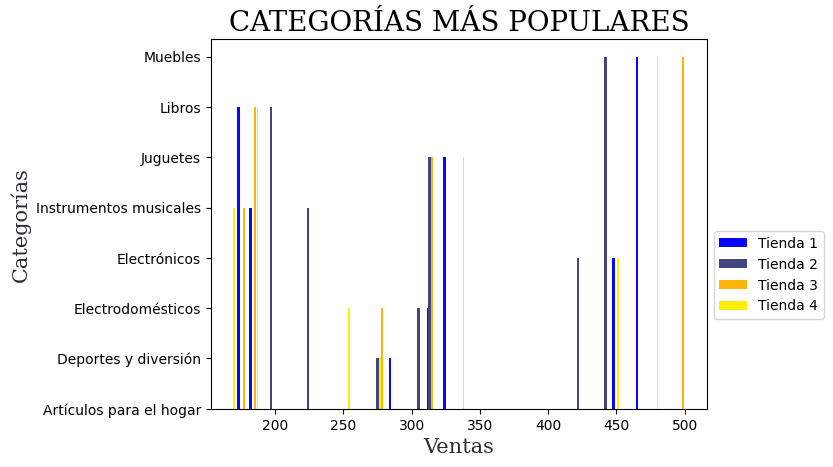

In [50]:
# Categorías.
categorias = np.array(tablaDeCategorias.index)

# Barras de las tiendas.
plt.bar(tablaDeCategorias['Ventas (tienda 1)'], categorias, width=2, color='#0707FF', label='Tienda 1')
plt.bar(tablaDeCategorias['Ventas (tienda 2)'], categorias, width=1.75, color='#444480', label='Tienda 2')
plt.bar(tablaDeCategorias['Ventas (tienda 3)'], categorias, width=1.50, color='#FFB408', label='Tienda 3')
plt.bar(tablaDeCategorias['Ventas (tienda 4)'], categorias, width=1.25, color='#FFF008', label='Tienda 4')

# Titulos
plt.title('CATEGORÍAS MÁS POPULARES', fontdict = fontTitle)
plt.xlabel('Ventas', fontdict=fontAxial)
plt.ylabel('Categorías', fontdict=fontAxial)

# Leyendas a las derecha
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Muestra diagrama
plt.show()

In [51]:
# Paleta de colores
mycolors = ['#0707FF','#444480','#FFB408','#FFF008']

In [52]:
myLabels = tablaDatos.index
def pieTiendas(tabla,factor,titulo,myexplode):
  # Colores y datos.
  plt.pie(tabla[factor], labels = myLabels, explode = myexplode, colors = mycolors, autopct='%1.1f%%')
  # Titulo
  plt.title(titulo, fontdict = fontTitle)

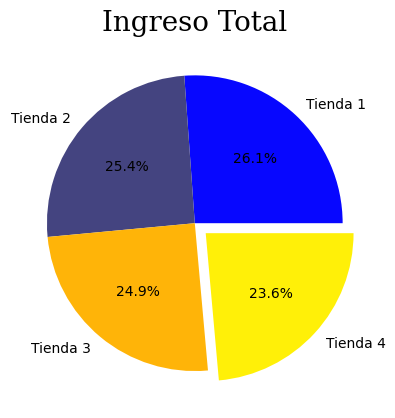

In [53]:
# Bordes de cada pedazo de pie.
myexplode = [0,0,0,0.1]
pieTiendas(tablaDatos,'Ingreso Total', 'Ingreso Total', myexplode)

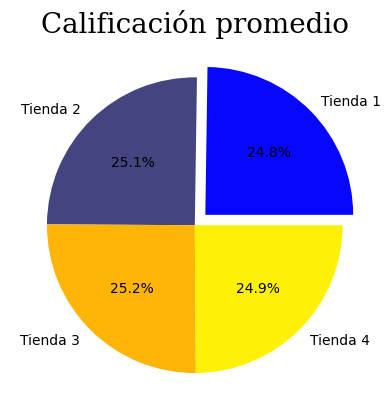

In [ ]:
myexplode = [0.1,0,0,0]
pieTiendas(tablaDatos,'Calificación promedio', 'Calificación promedio', myexplode)

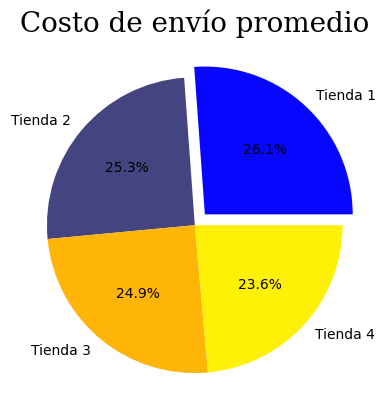

In [ ]:
# Pie de Costo de envio
myexplode = [0.1,0,0,0]
pieTiendas(tablaDatos,'Costo de envío promedio', 'Costo de envío promedio', myexplode)

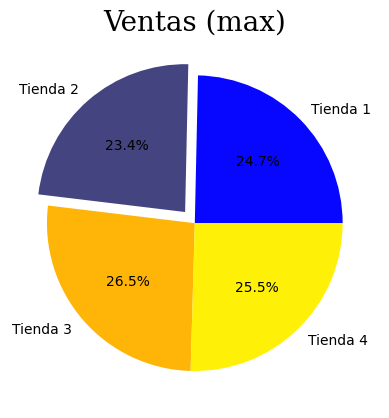

In [ ]:
myexplode = [0,0.1,0,0]
pieTiendas(tablaDatosCategoria,'Ventas (max)', 'Ventas (max)', myexplode)

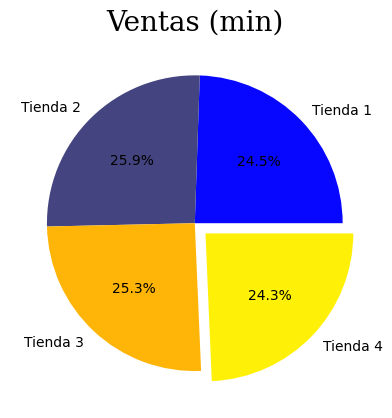

In [65]:
myexplode = [0,0,0,0.1]
pieTiendas(tablaDatosCategoria,'Ventas (min)', 'Ventas (min)', myexplode)

In [81]:
def pieVentaMm (tabla,tienda,titulo):
  # Colores y datos.
  plt.pie([tabla.loc[tienda,'Ventas (max)'],tabla.loc[tienda,'Ventas (min)'],tabla.loc[tienda,'Ventas Totales']], labels = ['Ventas (max)','Ventas (min)', 'Ventas'], colors = mycolors, autopct='%1.1f%%')
  # Titulo
  plt.title(titulo)
  plt.show()

In [87]:
def pieIngresoMm (tabla,tienda,titulo):
  # Colores y datos.
  plt.pie([tabla.loc[tienda,'Ingreso (max)'],tabla.loc[tienda,'Ingreso (min)'],tabla.loc[tienda,'Ingreso Total']], labels = ['Ingreso (max)','Ingreso (min)', 'Ingreso Total'], colors = mycolors, autopct='%1.1f%%')
  # Titulo
  plt.title(titulo)
  plt.show()

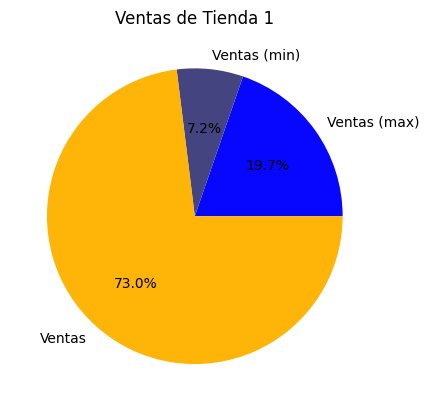

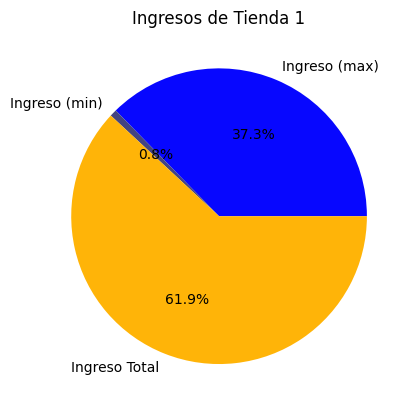

In [88]:
pieVentaMm(tablaDatosVentas,'Tienda 1','Ventas de Tienda 1')
pieIngresoMm(tablaDatosIngresos,'Tienda 1','Ingresos de Tienda 1')

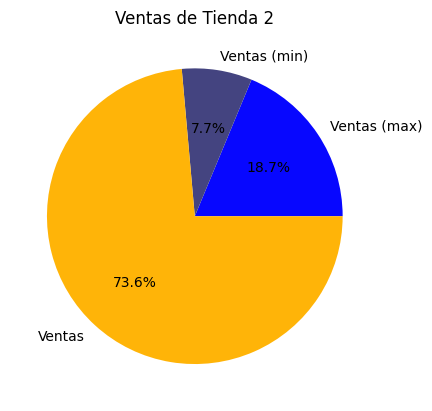

In [70]:
pieVentaMm(tablaDatosVentas,'Tienda 2','Ventas de Tienda 2',myexplode)

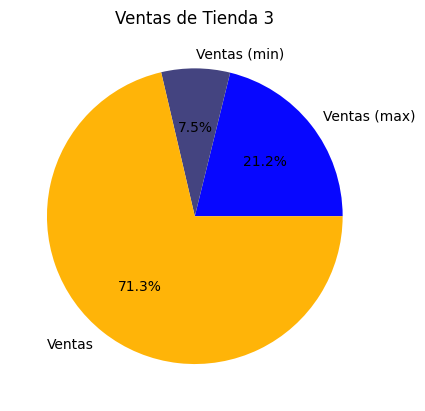

In [72]:
pieVentaMm(tablaDatosVentas,'Tienda 3','Ventas de Tienda 3',myexplode)

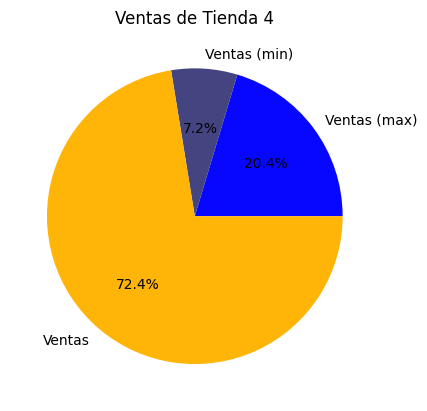

In [73]:
pieVentaMm(tablaDatosVentas,'Tienda 4','Ventas de Tienda 4',myexplode)

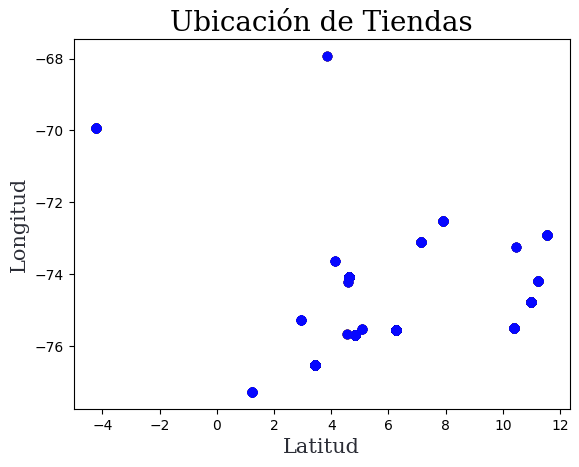

In [58]:
plt.scatter(tienda['lat'], tienda['lon'], color = mycolors[3])
plt.scatter(tienda2['lat'], tienda2['lon'], color = mycolors[1])
plt.scatter(tienda3['lat'], tienda3['lon'], color = mycolors[2])
plt.scatter(tienda4['lat'], tienda4['lon'], color = mycolors[0])

plt.title('Ubicación de Tiendas', fontdict = fontTitle)
plt.xlabel('Latitud', fontdict=fontAxial)
plt.ylabel('Longitud', fontdict=fontAxial)

plt.show()

# 10. Informe

Con base a los datos podemos notar que los datos son generamente muy parecido,
sin embargo, podemos notar tanto en las tablas como en las graficas que